In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Daubechies wavelets
<hr style="border-width:4px; border-color:coral"></hr>

The idea behind the Daubechies wavelet was to develop a basic building block that was continuous, but has the nice properties of the Haar wavelet.  

The Daubechies scaling function (analogous to the Haar "step" function) is defined *recursively* in terms of coefficients $h_0$, $h_1$, $h_2$, $h_3$ as

\begin{equation}
% \phi(x) = \sum_{k=0}^{3} h_k \phi(2x - k)
\phi(x) = h_0 \phi(2x) + h_1 \phi(2x-1) + h_2\phi(2x-2) + h_3 \phi(2x-3)
\end{equation}

where the coefficients are given by 

\begin{equation}
h_0  =  \frac{1 + \sqrt{3}}{4}, \qquad
h_1  =  \frac{3 + \sqrt{3}}{4}, \qquad
h_2  =  \frac{3 - \sqrt{3}}{4}, \qquad
h_3  =  \frac{1 - \sqrt{3}}{4}
\end{equation}

The scaling function is supported on the interval $[0,3]$ and is zero for $r <=0$ or $r >= 3$.  Daubechie proved that $\phi(x)$ has no simple closed from expression in terms of elementary functions, but it does satisfy some convenient properties. 

Reference :

   ["Wavelets Made Easy", Yves Nievergelt, (Birkhäuser,, 1999).](https://www.amazon.com/Wavelets-Made-Easy-Yves-Nievergelt/dp/0817640614)  

[Ten Lectures in Wavelets](https://epubs.siam.org/doi/book/10.1137/1.9781611970104), Ingrid Daubechies, (SIAM Publishing).


## Daubechies scaling function
<hr style="border-width:4px; border-color:coral"></hr>

A (slow) way to plot an approximation to $\phi(x)$ is to define a linaer operator on a function $g(x)$ 

\begin{equation}
T[g](x) = h_0 g(2x) + h_1 g(2x-1) + h_2g(2x-2) + h_3 g(2x-3)
\end{equation}

and then look for "fixed points" of this operator, e.g. functions $\phi$ that satisfy

\begin{equation}
\phi = T[\phi]
\end{equation}

Just as we do with a "fixed point" iteration used to solve $x = g(x)$, we can get an idea as to what $\phi(x)$ might look like by plotting successive iterates

\begin{equation}
g_{k+1}(x) = T[g_k](x) \equiv T^k[g_0]
\end{equation}

where $T^0[g] = g$, $T^1[g] = T[g]$, $T^2[g] = T[T[g]]]$ and so on.  The Daubechie scaling function is then

\begin{equation}
\phi(x) = \lim_{n \to \infty} T^n[g]
\end{equation}

For the Daubechie scaling function, the initial function $g_0(x)$ is set to the Haar "box" function

\begin{equation}
g_0(x) = 
 \left\{\begin{array}{rc}
1 & \mbox{if} \quad 0 \le x < 1 \\
0 & \mbox{otherwise}
\end{array}\right.
\end{equation}

In [91]:
def box(x,u=0,w=1):
    return where(logical_and(x >= u, x < w),1,0)
    
h0 = (1 + sqrt(3))/4
h1 = (3 + sqrt(3))/4
h2 = (3 - sqrt(3))/4
h3 = (1 - sqrt(3))/4
    
def T(x,n):
    if n == 0:
        return box(x) 
    else:
        n -= 1
        return h0*T(2*x,n) + h1*T(2*x-1,n) + h2*T(2*x - 2,n) + h3*T(2*x-3,n)
        

<IPython.core.display.Javascript object>


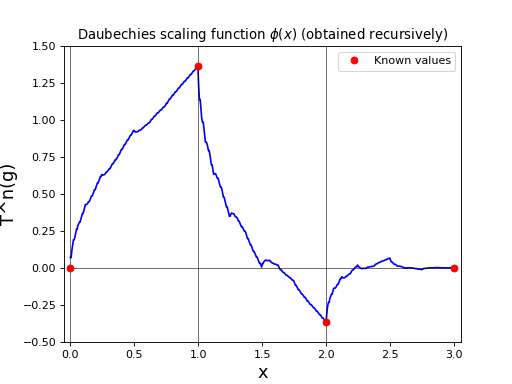

In [90]:
fig = figure(1)
clf()

N = 512
x = linspace(0,3,N+1)

hdl, = plot(x,box(x,0),'b-')

# Reference lines 
yl = [-0.5,1.5]
plot([0,3],[0,0],'k-',linewidth=0.5)
plot([0,0],yl,'k-',linewidth=0.5) 
plot([1,1],yl,'k-',linewidth=0.5)
plot([2,2],yl,'k-',linewidth=0.5)

xp = [0,1,2,3]
yp = [0,(1 + sqrt(3))/2, (1 - sqrt(3))/2,0]
plot(xp,yp,'r.',markersize=12,label='Known values')


xlim([-0.05,3.05])
ylim([-0.5,1.5])

title('Daubechies scaling function $\phi(x)$ (obtained recursively)')
xlabel('x',fontsize=16)
ylabel('T^n(g)',fontsize=16)

legend()

for k in range(8):
    hdl.set_ydata(T(x,k))
    
    fig.canvas.draw()            
    
    pause(1)    

## Efficient evalution of the scaling function
<hr style="border-width:4px; border-color:coral"></hr>

The scaling function has known values given by

\begin{equation}
\phi(0) = 0, \qquad 
\phi(1) = \frac{1 + \sqrt{3}}{2}, \qquad
\phi(2) = \frac{1 - \sqrt{3}}{2}, \qquad
\phi(3) = 0
\end{equation}

We can use these as initial values to obtain other values of $\phi(x)$ at *dyadic* points  $k2^{-j}$, where
$k$, $j$ are integers. 

For example, we can compute $\phi(1/2)$ as 

\begin{eqnarray}
\phi\left(\frac{1}{2}\right) & = & h_0 \phi(1) + h_1 \phi(1-1) + h_2 \phi(1-2) + h_3 \phi(1-3) \\
& = & h_0 \phi(1) + h_1 \cdot 0 + h_2 \cdot 0 + h_3 \cdot 0 \\
& = & \frac{1 + \sqrt{3}}{4} \cdot \frac{1 + \sqrt{3}}{2} = \frac{2 + \sqrt{3}}{4}
\end{eqnarray}

and $\phi(3/2)$ 

\begin{eqnarray}
\phi\left(\frac{3}{2}\right) & = & h_0 \phi(3) + h_1 \phi(3-1) + h_2 \phi(3-2) + h_3 \phi(3-3) \\
& = & h_0 \cdot 0 + h_1 \phi(2) + h_2 \phi(1) + h_3 \cdot 0 \\
& = & \frac{3 + \sqrt{3}}{4} \cdot \frac{1 - \sqrt{3}}{2} 
+ \frac{3 - \sqrt{3}}{4} \cdot \frac{1 + \sqrt{3}}{2} \\
& = & 0
\end{eqnarray}

and $\phi(5/2)$

\begin{eqnarray}
\phi\left(\frac{5}{2}\right) & = & h_0 \phi(5) + h_1 \phi(5-1) + h_2 \phi(5-2) + h_3 \phi(5-3) \\
& = & h_0 \cdot 0 + h_1 \cdot 0 + h_2 \cdot 0 + h_3 \phi(2) \\
& = & \frac{1 - \sqrt{3}}{4} \cdot \frac{1 - \sqrt{3}}{2} \\
& = & \frac{2-\sqrt{3}}{4}
\end{eqnarray}

Continuing in this manner, we can compute odd multiples of $1/4$ since these values will rely on odd multiples 
of $1/2$ and so on.  


## Daubechies wavelet
<hr style="border-width:4px; border-color:coral"></hr>

Just as in the case of the Haar wavelet, the 
Daubechies wavelet is defined in terms of the scaling function as 

\begin{equation}
\psi(x) = h_3\phi(2x + 2) - h_2 \phi(2x + 1) + h_1 \phi(2x) - h_0 \phi(2x-1)
\end{equation}

We can plot this wavelet in the same way we plotted the scaling function. 

Note that the wavelet is non-zero on the interval $[-1,2]$.  

Because of values can be obtained recursively (as for $\phi(x)$), fast algorithms can be developed based on the Daubechies wavelet. 

In [73]:
def phi(x,n=6):
    return T(x,n) 

def wavelet(x):
    return h3*phi(2*x+2) - h2*phi(2*x+1) + h1*phi(2*x) - h0*phi(2*x-1)

<IPython.core.display.Javascript object>


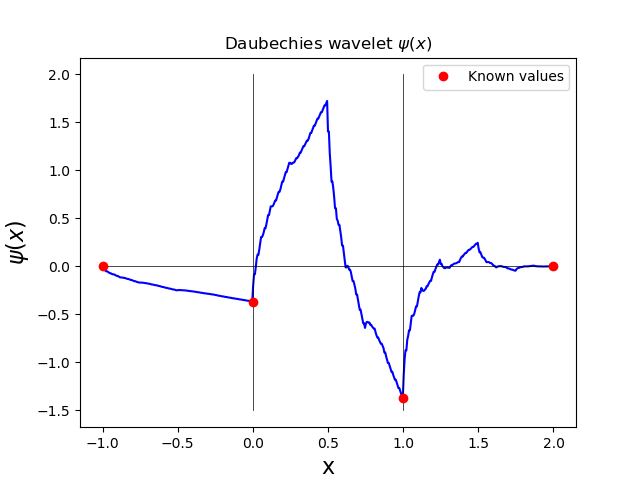

In [76]:
fig = figure(2)
clf()

N = 512
x = linspace(-1,2,N+1)
 
plot(x,wavelet(x),'b-')

# Reference lines
yl = [-1.5,2]
plot([-1,2],[0,0],'k-',linewidth=0.5)
plot([0,0],yl,'k-',linewidth=0.5)
plot([1,1],yl,'k-',linewidth=0.5)

xp = [-1,0,1,2]
yp = [0,(1 - sqrt(3))/2, -(1 + sqrt(3))/2,0]
plot(xp,yp,'r.',markersize=12,label='Known values')

title('Daubechies wavelet $\psi(x)$')
xlabel('x',fontsize=16)
ylabel('$\psi(x)$',fontsize=16)


legend()

## Connection to Haar wavelets
<hr style="border-width:4px; border-color:coral"></hr>

The Haar scaling functions also satisfy a recursion relation, given by 

\begin{equation}
\phi(x) = h_0\phi(2x) + h_1\phi(2x - 1)
\end{equation}

with $h_0 = h_1 = 1$.  In this case, the "box" function satisifies this recursion exactly, so there is no need for a recursive definition as with the Daubechies scaling function.

The corresponding wavelet is defined analogously as 

\begin{equation}
\psi(x) = h_0\phi(2x) - h_1\phi(2x - 1)
\end{equation}

which is also satisfied exactly by the Haar wavelet. 

In [92]:
def H(x,n):
    h0 = 1
    h1 = 1
    if n == 0:
        return box(x)
    else:
        return h0*H(2*x,n-1) + h1*H(2*x - 1,n-1)
            
def haar_wavelet(x):
    h0 = 1
    h1 = 1
    return h0*box(2*x) - h1*box(2*x - 1)

<IPython.core.display.Javascript object>


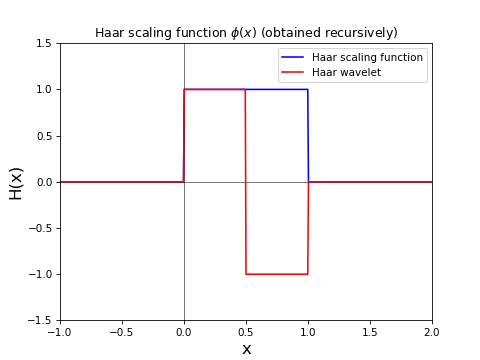

In [94]:
fig = figure(3)
clf()

N = 512
x = linspace(-1,2,N+1)

hdl, = plot(x,H(x,0),'b-',label='Haar scaling function')

# Reference lines
yl = [-1.5,1.5]
plot([-1,2],[0,0],'k-',linewidth=0.5)
plot([0,0],yl,'k-',linewidth=0.5)

xlim([-1,2])
ylim(yl)

title('Haar scaling function $\phi(x)$ (obtained recursively)')
xlabel('x',fontsize=16)
ylabel('H(x)',fontsize=16)

for k in range(4):
    hdl.set_ydata(H(x,k))
    
    fig.canvas.draw()            
    
    pause(0.1)    
    
plot(x,haar_wavelet(x),'r',label='Haar wavelet')

legend()

## Design of Daubechies wavelets
<hr style="border-width:4px; border-color:coral"></hr>

1.  The idea is to seek functions which satisfy $T[g] = g$.  This is translated to an eigenvalue problem in which which an eigenfunction of $T$ is sought that has associated eigenvalue equal to 1. 


2. Does the corresponding eigenspace $\mbox{Ker}(T - I)$ have dimension 1 so that the solution is unique?  


3. Does the "fixed point iteration" $g = T[g]$ actually converge?  

Through Fourier analysis, the above questions are answered in the affirmative.  In fact, there is exactly one function satisfying the recursion relation 1 (above) with $\lVert \phi \rVert = 1$.  

## Orthogonality
<hr style="border-width:4px; border-color:coral"></hr>

Define

\begin{equation}
\phi_k^{(m)}(x) = \phi(2^m x - k)
\end{equation}

Then for all indices $k,\ell,m$, 

\begin{equation}
\langle \phi_k^{(m)}, \phi_{\ell}^{(m)}\rangle = \left\{
\begin{array}{lc}
2^{-m} & \mbox{if} \quad k = \ell, \\
0 & \mbox{if} \quad k \ne \ell, \\
\end{array} \right.
\end{equation}

Defining a family of wavelet functions analogously, we have 

\begin{equation}
\langle \psi_k^{(m)}, \psi_{\ell}^{(m)}\rangle = \left\{
\begin{array}{lc}
2^{-m} & \mbox{if} \quad k = \ell, \\
0 & \mbox{if} \quad k \ne \ell, \\
\end{array} \right.
\end{equation}

Furthermore, we have $\langle \phi_{\ell}^{(m)}, \psi_{h}^{(n)}\rangle$ for $(m,\ell) \ne (n,h)$. 

* These can be use to interpolate functions *in an approximate sense*

* Availability of fast transforms makes these wavelets a practical choice for many applications